# Stack Overflow Survey Analysis

Stack Overflow is likely one of the largest and most trusted online community of professional developers in the world today. I'm a Software Engineer myself and I can't think of a week in the past year in which I didn't check it at least one day to find an answer to a particular problem I faced. Whenever I run a Google Search for a problem, I usually jump at the first stack overflow link provided and chances are I won't have to go anywhere else.

Each year since 2011, Stack Overflow runs an Annual Developer survey that examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software. I learned about it recently, and it immediately sparked my interest as it offers an opportunity to zoom out and learn about current trends in the field I'm a part of.

Stack Overflow already provides an in-depth analysis of the responses. I examined the [2019 analysis](https://insights.stackoverflow.com/survey/2019) and I thought it was really good, but one think I would like to have seen is a breakdown of the responses at a continent level. They do provide response counts at this level in the Methodology section, but I didn't find anything else past that. Additionally, I didn't get much of a sense about how the results compare to previous years.

This motivated me to run an analysis in which I zoom out to the continents level and look at the response breakdown for the past 3 years. My goal is to get a sense of how uniform (or diverse) are the responses across the world when looked from certain dimensions that I personally find relevant. Additionally, by looking at past years we can potentially get an idea of some trends in the field.

In particular for responses from the past 3 years, and based on the kind of responses I found interesting in the [2019 analysis](https://insights.stackoverflow.com/survey/2019), I decided to try to get a sense the following metrics at a continent level:

- Number of responses
- Gender breakdown
- Average age in which a developer starts coding
- Top 3 most popular programming languages
- Top 3 roles with the highest salary


## Other possible questions to answer

- What's the distribution of ages amongst devs?
- What sort of roles do users have? How much do they earn?
- How optimistic about their future are developers?
- What was the top blocker for productivity?
- How often do users visit Stack Overflow?
- What's the education level and professional background of users?
- What cities are developers coming the most from?
- What is the opinion of developers on Blockchain Technology?
- What's the distribution of employment status?
- Distribution of company types

## Reading the Data

Let's start by importing all the required libraries in a single place:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pycountry_convert as pyc

sns.set();
%matplotlib inline

Assuming the initial setup instructions from the project [README.md](https://github.com/ojcastillo/StackOverflow-Survey-Analysis/blob/master/README.md#initial-setup) were followed, there should now be a folder `datasets` with the survey results from 2017, 2018 and 2019. With that in place, we can read the data in the following way:

In [3]:
datasets = {}
for year in (2017, 2018, 2019):
    print('Loading data for year', year)
    datasets[year] = {
        'data': pd.read_csv(f'./datasets/{year}/survey_results_public.csv'),
        'schema': pd.read_csv(f'./datasets/{year}/survey_results_schema.csv'),
    }

Loading data for year 2017
Loading data for year 2018


/Users/ojcm/anaconda3/envs/stackoverflow/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loading data for year 2019


We'll ignore the warning when reading the data for 2018 since the values are loaded still (as mentioned [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.errors.DtypeWarning.html)) and we can clean them later. But let's examine each dataset for validation and get an idea of the kind of data we're dealing with: 

In [4]:
print('2017 dataset')
print('Number of rows:', datasets[2017]['data'].shape[0])
print('Number of columns:', datasets[2017]['data'].shape[1])
datasets[2017]['data'].head(3)

2017 dataset
Number of rows: 51392
Number of columns: 154


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN


In [5]:
print('2018 dataset')
print('Number of rows:', datasets[2018]['data'].shape[0])
print('Number of columns:', datasets[2018]['data'].shape[1])
datasets[2018]['data'].head(3)

2018 dataset
Number of rows: 98855
Number of columns: 129


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print('2019 dataset')
print('Number of rows:', datasets[2019]['data'].shape[0])
print('Number of columns:', datasets[2019]['data'].shape[1])
datasets[2019]['data'].head(3)

2019 dataset
Number of rows: 88883
Number of columns: 85


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult


## Preparing data for analysis

Working backwards from the questions that we want to answer, our aim is to construct a single data frame that contains the following dimensions per response:

- Year of response
- Continent of residence
- Gender
- Preferred programming language
- Age of first line of code
- Current role
- Current yearly salary

To kick things off, let's first get an idea of what columns are shared across the datasets already:

In [7]:
# Construct a set of the column names shared across datasets
common_cols = (set(datasets[2017]['schema'].Column) 
    & set(datasets[2018]['schema'].Column)
    & set(datasets[2019]['schema'].Column))
print('Common column names across years: ', common_cols)

Common column names across years:  {'Respondent', 'Country', 'Gender'}


So country and gender are already common across datasets, and we get year for free as we already divide them that way. So let's start by constructing a single dataframe that has year, country and gender dimensions:

In [8]:
def join_datasets_by_year(datasets, columns):
    """Joins the yearly datasets into a single DataFrame.
    
    The function assummes the columns provided exist across datasets
    to construct a single DataFrame aht contains those columns in
    addition to a Year dimension.
    """
    full_df = None
    for year in datasets:
        year_df = datasets[year]['data'][columns].copy()
        year_df['Year'] = year
        if full_df is None:
            full_df = year_df
        else:
            full_df = full_df.append(year_df)
    return full_df

In [9]:
full_df = join_datasets_by_year(datasets, ['Country', 'Gender'])
print('Number of rows in new single DataFrame: ', full_df.shape[0])
full_df.head()

Number of rows in new single DataFrame:  239130


,Country,Gender,Year
0,United States,Male,2017
1,United Kingdom,Male,2017
2,United Kingdom,Male,2017
3,United States,Male,2017
4,Switzerland,NaN,2017


From country we can get continent, and gender we can hopefully use as-is after making sure is clean. For the rest of columns, we'll have to do some extra leg work.

### Adding a continent dimension



In [10]:
from pycountry import countries

In [19]:
full_df['CountryAlpha2'] = full_df['Country'].apply(lambda c: countries.search_fuzzy(c));

LookupError: i prefer not to say

In [5]:
# Set up a map of country name to continent
continents_map = {}
for key, val in pyc.map_countries().items():
    if key == 'continent':
        # For some reason the map contains this, which is not a country so we can skip
        continue
    try:
        continents_map[key] = pyc.country_alpha2_to_continent_code(val['alpha_2'])
    except KeyError:
        continents_map[key] = None

In [57]:
lookup_cache = {}
def infer_country_code(country):
    """Infers Alpha 2 country codes from name using a database of acceptable names."""
    try:
        cstr = str(country)
        clower = cstr.lower()
        if clower in lookup_cache:
            return lookup_cache[clower]
        from_db = countries.get(name=cstr) 
        if not from_db:
            # this is expensive to run, so only do it if exact matching fails
            from_db = countries.lookup(cstr)[0]
        lookup_cache[clower] = from_db.alpha_2
        return lookup_cache[clower]
    except Exception:
        return 'None'

In [54]:
countries.get(name='United States')

Country(alpha_2='US', alpha_3='USA', name='United States', numeric='840', official_name='United States of America')

In [73]:

sorted(lookup_cache.keys())

['afghanistan',
 'aland islands',
 'albania',
 'algeria',
 'american samoa',
 'andorra',
 'angola',
 'anguilla',
 'antarctica',
 'antigua and barbuda',
 'argentina',
 'armenia',
 'aruba',
 'australia',
 'austria',
 'azerbaijan',
 'bahamas',
 'bahrain',
 'bangladesh',
 'barbados',
 'belarus',
 'belgium',
 'belize',
 'benin',
 'bermuda',
 'bhutan',
 'bolivia',
 'bosnia and herzegovina',
 'botswana',
 'bouvet island',
 'brazil',
 'british indian ocean territory',
 'brunei darussalam',
 'bulgaria',
 'burkina faso',
 'burundi',
 'cambodia',
 'cameroon',
 'canada',
 'cayman islands',
 'central african republic',
 'chad',
 'chile',
 'china',
 'christmas island',
 'colombia',
 'comoros',
 'cook islands',
 'costa rica',
 'croatia',
 'cuba',
 'cyprus',
 'czech republic',
 "côte d'ivoire",
 "democratic people's republic of korea",
 'denmark',
 'djibouti',
 'dominica',
 'dominican republic',
 'ecuador',
 'egypt',
 'el salvador',
 'eritrea',
 'estonia',
 'ethiopia',
 'falkland islands',
 'fiji',
 '

In [59]:
full_df['CountryCode'] = full_df['Country'].apply(infer_country_code);

In [72]:
countries.lookup('united states')

Country(alpha_2='US', alpha_3='USA', name='United States', numeric='840', official_name='United States of America')

In [65]:
no_country = full_df['CleanCountry'] == 'None'
print('Without country: ', len(full_df[no_country]))
full_df[no_country].Country.value_counts()

Without country:  3330


Iran, Islamic Republic of...                 921
South Korea                                  493
Hong Kong (S.A.R.)                           407
Other Country (Not Listed Above)             220
Venezuela, Bolivarian Republic of...         211
I prefer not to say                          140
The former Yugoslav Republic of Macedonia    108
Bosnia-Herzegovina                            66
Moldavia                                      65
Azerbaidjan                                   27
Libyan Arab Jamahiriya                        24
Swaziland                                     14
Democratic Republic of the Congo              14
Congo, Republic of the...                     13
North Korea                                   11
Cape Verde                                     7
New Caledonia (French)                         7
Virgin Islands (USA)                           5
Reunion (French)                               4
U.S. Minor Outlying Islands                    4
Ivory Coast (Cote D'

In [17]:
full_df['Continent'] = full_df['Country'].apply(lambda c: continents_map[c] if c in continents_map else None);

Text(0.5, 1.0, 'Number of rows per continent')

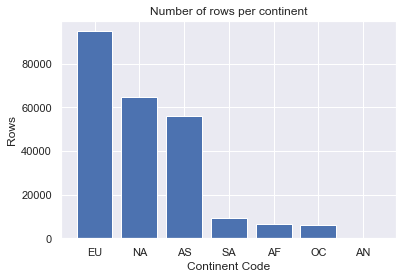

In [19]:
continents = full_df['Continent'].value_counts()
plt.bar(continents._index, continents.values)
plt.xlabel('Continent Code')
plt.ylabel('Rows')
plt.title('Number of rows per continent')

Text(0.5, 1.0, 'Number of rows per South American Country')

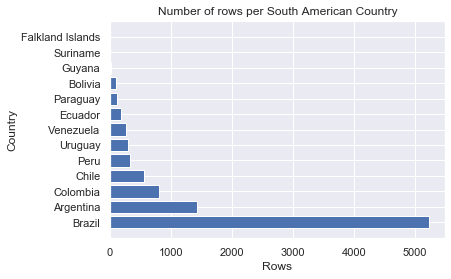

In [20]:
sa_countries = full_df[full_df['Continent'] == 'SA'].Country.value_counts()
plt.barh(sa_countries._index, sa_countries.values)
plt.xlabel('Rows')
plt.ylabel('Country')
plt.title('Number of rows per South American Country')

In [23]:
full_df[full_df['Continent'] == 'SA'].Country.value_counts()

Brazil              5230
Argentina           1419
Colombia             801
Chile                555
Peru                 323
Uruguay              291
Venezuela            270
Ecuador              183
Paraguay             123
Bolivia              103
Guyana                10
Suriname               4
Falkland Islands       1
Name: Country, dtype: int64

In [24]:
plt.barh(counts._index[:20], counts.values[:20])
plt.title('Counts per country')

NameError: name 'counts' is not defined

In [25]:
vz_df = full_df[full_df['Country'] == 'Venezuela']
vz_df.head()

,Country,Year,Gender,Continent
5029,Venezuela,2017,Male,SA
6575,Venezuela,2017,Male,SA
6603,Venezuela,2017,NaN,SA
7288,Venezuela,2017,Male,SA
8375,Venezuela,2017,Male,SA


In [26]:
vz_df['Year'].value_counts()

2018    123
2019     88
2017     59
Name: Year, dtype: int64

In [27]:
vz_df['Gender'].value_counts()

Male      118
Man        86
Female      7
Woman       1
Name: Gender, dtype: int64